In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
df = pd.read_csv("moon_walker/main/dataset/resize_borvo.csv") 

grid = {}
for _, row in df.iterrows():
    grid[(int(row["i"]), int(row["j"]))] = {"H": row["H"], "W": row["W"]}

In [89]:
# Fungsi ambil tetangga 8 arah (termasuk diagonal)
def get_all_neighbors(pos):
    i, j = pos
    directions = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    neighbors = [(i + di, j + dj) for di, dj in directions]
    return [n for n in neighbors if n in grid]

# Fungsi hitung skor W/E
def get_score(current_pos, neighbor_pos):
    H1 = grid[current_pos]["H"]
    H2 = grid[neighbor_pos]["H"]
    S = H1 - H2

    if S > 0.5:
        return -np.inf  # Tidak aman → skip

    E = 1 + 1 * abs(S)
    W = grid[neighbor_pos]["W"]
    return W / E

In [ ]:
#Algoritma Simulated Annealing
def simulated_annealing_fair(start, Tmax=1000, Tmin=1.0, alpha=0.95, max_iter=500):
    if start not in grid:
        print(f"Titik {start} tidak ditemukan dalam dataset.")
        return []

    current = start
    path = [current]
    visited = set([current])

    current_score = 0

    T = Tmax

    for _ in range(max_iter):
        if T < Tmin:
            break

        neighbors = get_all_neighbors(current)
        valid_neighbors = [n for n in neighbors if n not in visited]

        if not valid_neighbors:
            break

        next_ = random.choice(valid_neighbors)
        score = get_score(current, next_)
        if score == -np.inf:
            continue

        delta = score

        # Aturan SA: selalu terima jika lebih baik, atau probabilistik jika lebih buruk
        if delta > 0 or random.random() < np.exp(delta / T):
            current = next_
            current_score += score
            path.append(current)
            visited.add(current)

        T *= alpha

    return path


In [ ]:
# Titik uji coba
test_points = [
    (540/2, 648/2),
    (20/2, 502/2),
    (410//2, 915//2),
]

# Jalankan algoritma untuk semua titik uji
for idx, point in enumerate(test_points, 1):
    print(f"\n=== Titik {idx} - Start di {point} ===")
    
    #kalau mau hasil yang beda pake seed yang beda, tapi jangan lupa buat ganti seed di visualisasi mapnya jg
    #seed bagus sejauh ini: 3,10,23,38
    random.seed(23 + idx)
    path = simulated_annealing_fair(point)
    print(f"Jumlah langkah: {len(path)}")
    print("Jalur:")
    for p in path:
        print(p)


=== Titik 1 - Start di (270.0, 324.0) ===
Jumlah langkah: 114
Jalur:
(270.0, 324.0)
(271.0, 324.0)
(272.0, 325.0)
(273.0, 324.0)
(274.0, 324.0)
(275.0, 324.0)
(274.0, 323.0)
(273.0, 323.0)
(272.0, 322.0)
(272.0, 321.0)
(272.0, 320.0)
(273.0, 321.0)
(273.0, 320.0)
(272.0, 319.0)
(273.0, 318.0)
(272.0, 318.0)
(272.0, 317.0)
(273.0, 317.0)
(274.0, 317.0)
(275.0, 318.0)
(275.0, 317.0)
(276.0, 316.0)
(275.0, 315.0)
(276.0, 314.0)
(277.0, 315.0)
(277.0, 316.0)
(278.0, 316.0)
(278.0, 315.0)
(279.0, 314.0)
(279.0, 313.0)
(278.0, 312.0)
(278.0, 313.0)
(277.0, 312.0)
(276.0, 312.0)
(275.0, 313.0)
(274.0, 314.0)
(275.0, 314.0)
(274.0, 313.0)
(273.0, 314.0)
(272.0, 313.0)
(271.0, 313.0)
(272.0, 312.0)
(273.0, 312.0)
(273.0, 311.0)
(274.0, 310.0)
(275.0, 311.0)
(276.0, 310.0)
(277.0, 310.0)
(277.0, 309.0)
(276.0, 309.0)
(275.0, 308.0)
(275.0, 309.0)
(276.0, 308.0)
(276.0, 307.0)
(277.0, 308.0)
(278.0, 307.0)
(278.0, 306.0)
(278.0, 305.0)
(277.0, 305.0)
(278.0, 304.0)
(279.0, 304.0)
(279.0, 303.0)


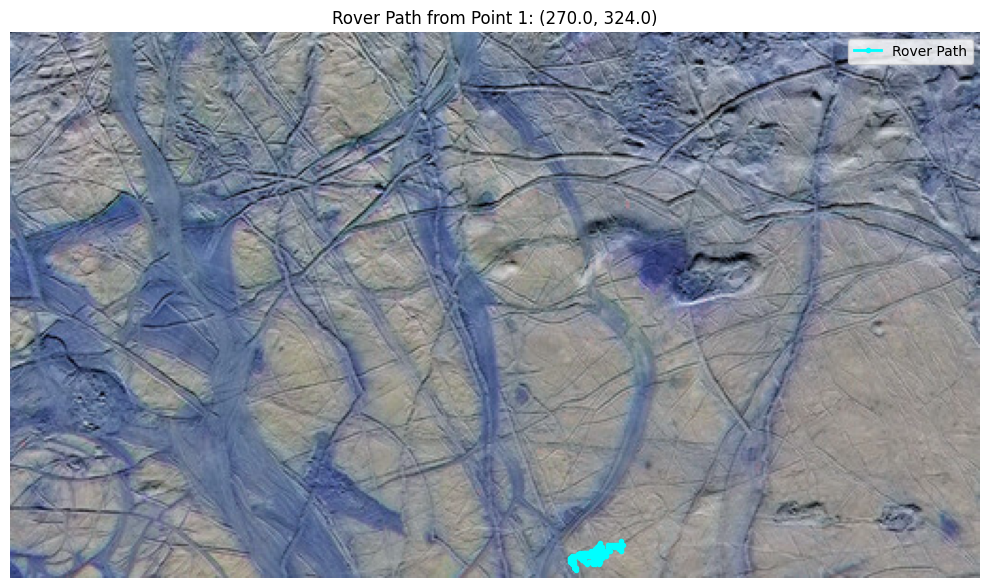

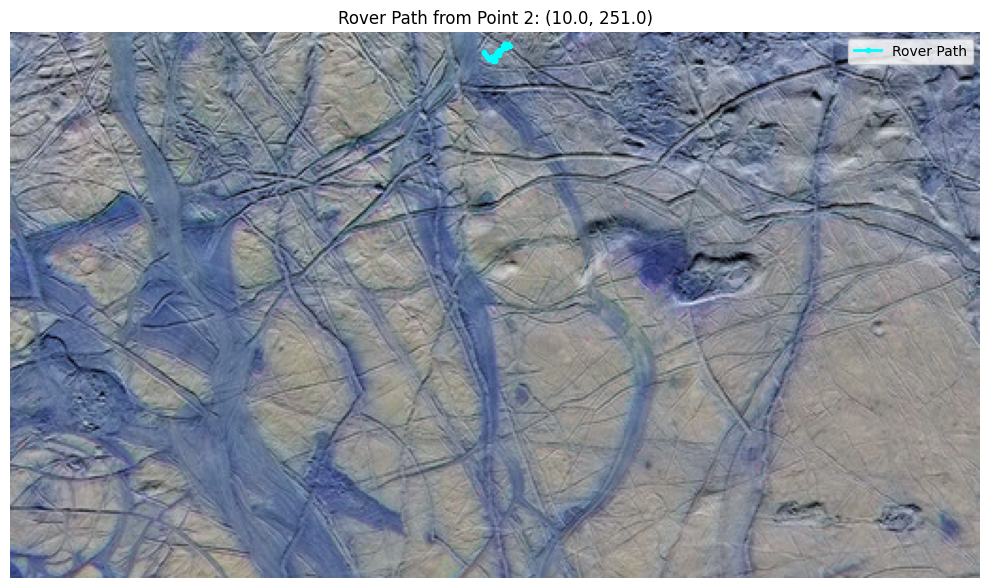

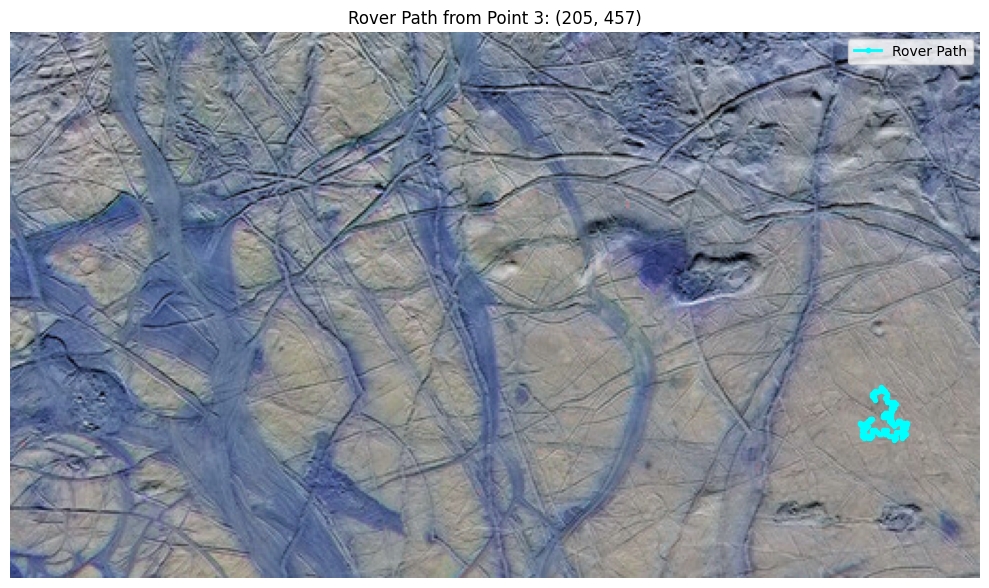

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Muat gambar height map dan konversi ke grayscale
img = cv2.imread("moon_walker/main/europa_map/raw/resize_borvo_mensa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
H_map = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)  # Representasi elevasi sederhana

# Visualisasi jalur untuk semua titik uji coba
for idx, point in enumerate(test_points, 1):
    
    #kalau mau hasil yang beda pake seed yang beda, tapi jangan lupa buat ganti seed di kode algo SA nya jg
    #seed bagus sejauh ini: 3,10,23,38
    random.seed(23 + idx)
    path = simulated_annealing_fair(point)
    path_x = [j for i, j in path]  # j = x-axis
    path_y = [i for i, j in path]  # i = y-axis

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.plot(path_x, path_y, color="cyan", marker="o", linewidth=2, markersize=3, label="Rover Path")
    plt.title(f"Rover Path from Point {idx}: {point}")
    plt.legend()
    plt.axis("off")
    plt.tight_layout()
    plt.show()
